# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [137]:
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

c:\Users\Lenovo\.conda\envs\COM222ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [2]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [24]:
df[["lead_time", "adr"]].head(5)

,lead_time,adr
0,342,0.0
1,737,0.0
2,7,75.0
3,13,75.0
4,14,98.0


In [23]:
df[["lead_time", "adr"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lead_time  119390 non-null  int64  
 1   adr        119390 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [19]:
df[["lead_time", "adr"]].describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


In [6]:
df[["lead_time", "adr"]].skew()

lead_time     1.346550
adr          10.530214
dtype: float64

<bound method Axes.hist of <Axes: >>

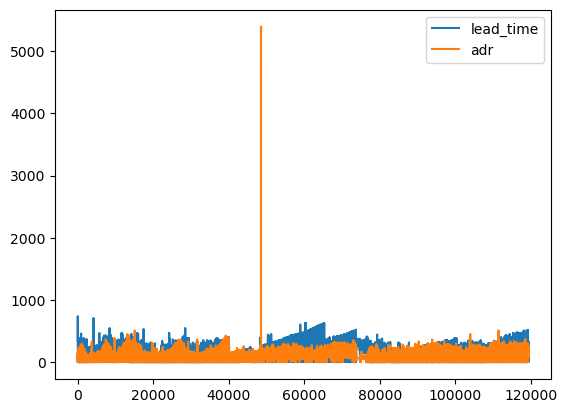

In [44]:
df[["lead_time", "adr"]].plot().hist

<Axes: ylabel='Frequency'>

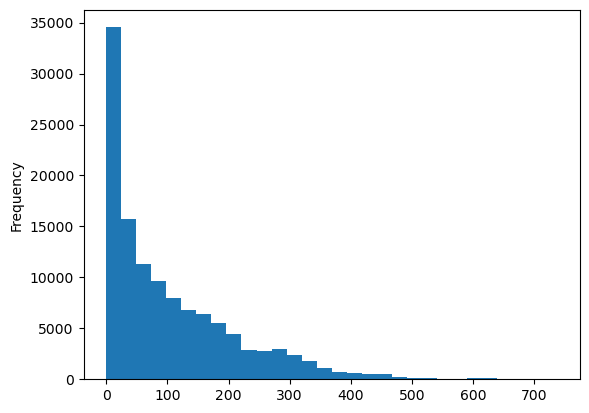

In [53]:
df["lead_time"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

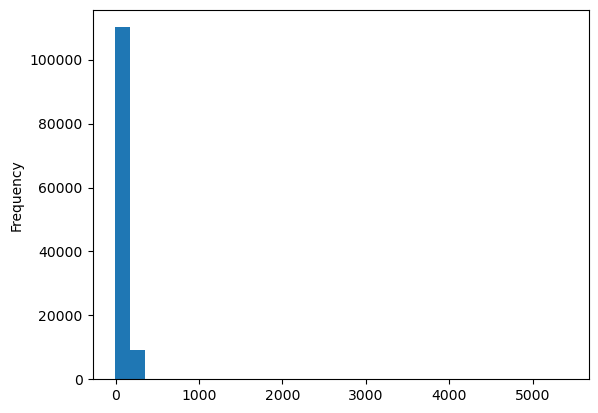

In [52]:
df["adr"].plot.hist(bins=30)

<Axes: xlabel='lead_time', ylabel='adr'>

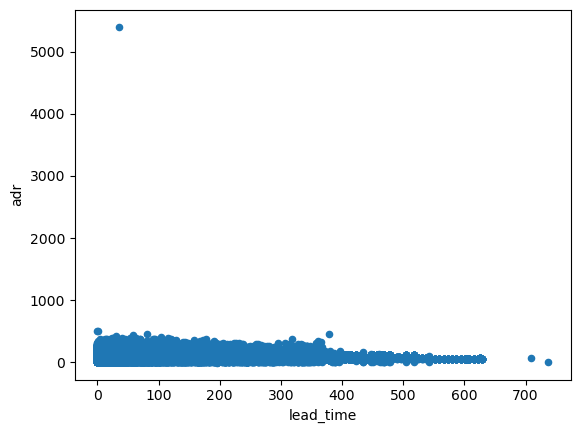

In [43]:
df.plot.scatter(x='lead_time', y='adr') 

## **Analysis**

**Lead Time**
- The mean and the median are approximately 104 and 69 respectively, indicating a right-skewed distribution, and has a skewness value of 1.35 which is a moderate positive skew.
- The interquantile range is 18 days to 160 days, which indicates the half of the bookings occurs within approximately 6 months of arrival.
- It has a maximum value of 737 days which explains that a customer book nearly about 2 years early which is a rare case.
- **Most of the bookings are relatively close to the arrival date (around 2-3 months in advance), while a small number of bookings are far in advance.**

**ADR (Average Daily Rate)**
- The mean and the median are approximately 101 and 94 respectively, also indicating a right-skewed distribution, and has a skewness value of 10.53 which is an extrreme positive skew.
- The interquantile range is 69.29 to 126, which indicates that most hotels are priced around those range.
- The minimun value is a negative number which indicates an error or likely reflects to refunds, while the maximum value is 5400 which indicates a rare cases likely an luxurious accomodation.
- **Most of the hotel rates are around 69 to 126, with a small number of extremely high rates on luxurious hotels.**



## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [58]:
df[["is_canceled", "lead_time"]].head(10)

,is_canceled,lead_time
0,0,342
1,0,737
2,0,7
3,0,13
4,0,14
5,0,14
6,0,0
7,0,9
8,1,85
9,1,75


In [66]:
df.groupby("is_canceled")["lead_time"].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


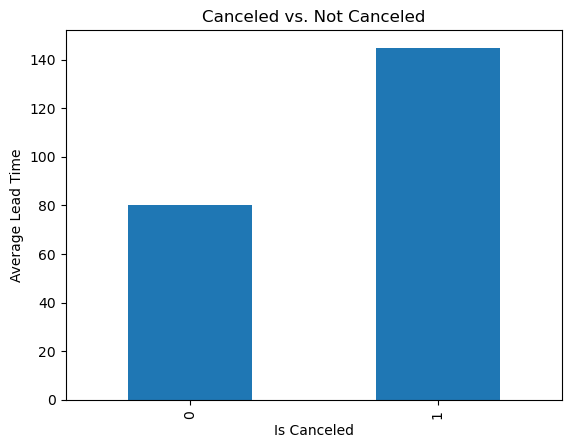

In [64]:
cancellations_and_lead_time = df.groupby('is_canceled')['lead_time'].mean().plot.bar(title='Canceled vs. Not Canceled')
plt.xlabel('Is Canceled')
plt.ylabel('Average Lead Time')
plt.show()


## **Analysis**

- There is a noticable difference in average time between the two. The Not Canceled (0) has an average of around 80 days, while the Canceled (1) has an average of around 144 days.
- **These explains that the higher the value of lead time increases the chances of the bookings getting canceled.**



## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [77]:
df.groupby(["arrival_date_month", "hotel"]).agg(
    adr_mean = ('adr', 'mean'),
    adr_median = ('adr', 'median'),
    hotel_count = ('hotel', 'count')
)

adr_mean  adr_median  hotel_count
arrival_date_month hotel                                            
April              City Hotel    111.251838     105.000         7480
                   Resort Hotel   77.849496      75.000         3609
August             City Hotel    114.680455     109.000         8983
                   Resort Hotel  186.790574     188.420         4894
December           City Hotel     88.826307      85.000         4132
                   Resort Hotel   68.984230      57.865         2648
February           City Hotel     85.088278      80.000         4965
                   Resort Hotel   55.171930      51.000         3103
January            City Hotel     82.628986      80.000         3736
                   Resort Hotel   49.461883      47.600         2193
July               City Hotel    110.734292     107.100         8088
                   Resort Hotel  155.181299     152.500         4573
June               City Hotel    119.074341     117.370         7894
                   Resort Hotel  110.444749     105.000         3045
March              City Hotel     92.643116      88.000         6458
                   Resort Hotel   57.520147      55.600         3336
May                City Hotel    121.638560     120.000         8232
                   Resort Hotel   78.758134      73.000         3559
November           City Hotel     88.069601      85.000         4357
                   Resort Hotel   48.273993      45.000         2437
October            City Hotel     99.974498      99.870         7605
                   Resort Hotel   62.097617      58.000         3555
September          City Hotel    110.004661     107.000         7400
                   Resort Hotel   93.252030      86.000         3108

In [81]:
# arrange the mnths

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

df["arrival_date_month"] = pd.Categorical(
    df["arrival_date_month"],
    categories=month_order,
    ordered=True
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34428\171931524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean()


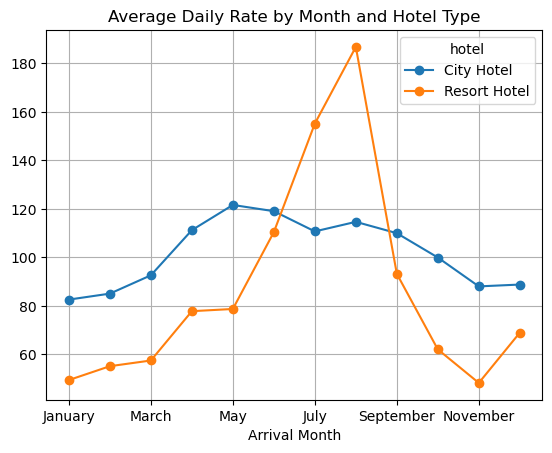

In [88]:
seasonal_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean()

seasonal_adr.unstack().plot(title='Average Daily Rate by Month and Hotel Type', marker='o')
plt.xlabel('Arrival Month')
plt.grid(True)

## **Analysis**

- Resort Hotels have higher ADR values than City Hotels on months of July and August. On the other hand, City Hotels have higher ADR values than Resort Hotels on months outside July and August.
- **This clearly indicates that Resort Hotels are very dependent on tourism as July and August are the peak of summer season in Northern Hemisphere.**

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [128]:
df.groupby("is_repeated_guest").agg({
    "is_canceled": "mean",
    "booking_changes": "mean",
    "lead_time": "mean"
})


,is_canceled,booking_changes,lead_time
is_repeated_guest,,,
0,0.377851,0.219692,106.425221
1,0.144882,0.264567,30.786352


Text(0, 0.5, 'Cancellation Rate')

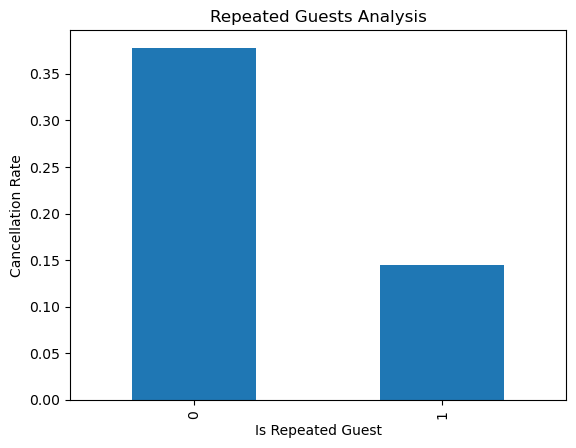

In [132]:
repeated_guests_to_is_canceled = df.groupby('is_repeated_guest')['is_canceled'].mean()

repeated_guests_to_is_canceled.plot.bar(title='Repeated Guests Analysis')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Cancellation Rate')

Text(0, 0.5, 'Average Booking Changes')

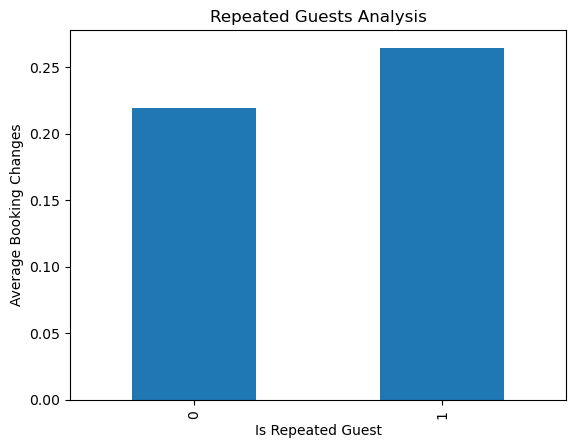

In [131]:
repeated_guests_to_booking_changes = df.groupby('is_repeated_guest')['booking_changes'].mean()

repeated_guests_to_booking_changes.plot.bar(title='Repeated Guests Analysis')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Booking Changes')

Text(0, 0.5, 'Average Lead Time')

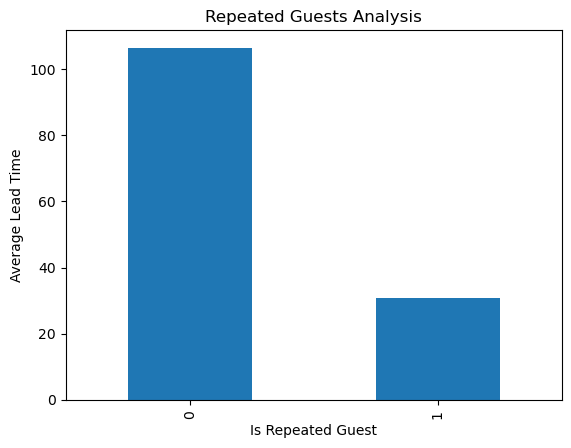

In [130]:
repeated_guests_to__lead_time = df.groupby('is_repeated_guest')['lead_time'].mean()

repeated_guests_to__lead_time.plot.bar(title='Repeated Guests Analysis')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Average Lead Time')

## **Analysis**

**Cancellation Rate**
- New guests have a mean of 0.38 in cancellation rate, while repeated guests have a mean of  0.14 cancellation rate.
- **These explains that non-repeating guests have higher chance of cancelling their bookings than repeating guests**

**Booking Changes**
- New guests have an average of 0.22 in number of booking changes, while repeated guests have an aveage 0.26. The value of these two are  close to  each other
- **This means that non-repeating and repeating guests guests have almost the same behavior on booking changes**

**Booking Changes**
- New guests have an average lead time of 106 days, while repeated guests have an aveage 30 days. 
- **This indicates that repeating guests tends to book 1 month before their check-in while non-repeating guests book around 3-4 months.**


## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [133]:
df['deposit_type_encoded'] = df['deposit_type'].astype('category').cat.codes


cols = ['is_canceled',
        'lead_time',
        'total_of_special_requests',
        'booking_changes',
        'days_in_waiting_list',
        'previous_cancellations',
        'previous_bookings_not_canceled',
        'required_car_parking_spaces',
        'deposit_type_encoded',
        'adr'
        ]

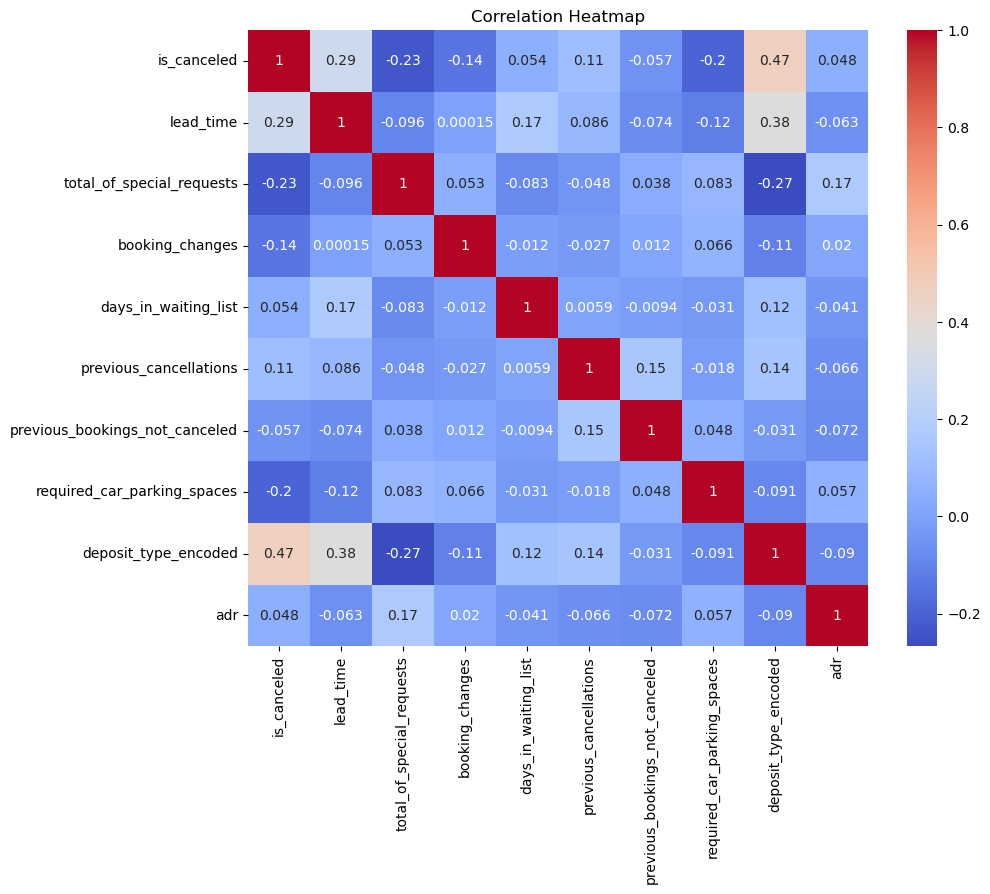

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [144]:
df.groupby("is_canceled").agg({
    "lead_time": "mean",
    "deposit_type_encoded": "mean",
    "adr": "mean",
    "previous_cancellations": "mean"
})

,lead_time,deposit_type_encoded,adr,previous_cancellations
is_canceled,,,,
0,79.984687,0.004590,99.987693,0.015792
1,144.848815,0.329369,104.964333,0.208348


## **Analysis**

- **Lead time and deposit type** are the two variable that strongly influence the booking cancellations. Grouped cancellation rates confirm that long lead-time, no-deposit bookings have the highest cancellation probability.
- Additional information is that higher adr or previous_cancellations increases the chances of cancellations.
